In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("mydata.csv")

In [46]:
data
import seaborn as sns

In [47]:
data[['longitude','latitude']]
import warnings
warnings.filterwarnings("ignore")

In [48]:
long,lat = data.longitude,data.latitude
data.shape

(17000, 9)

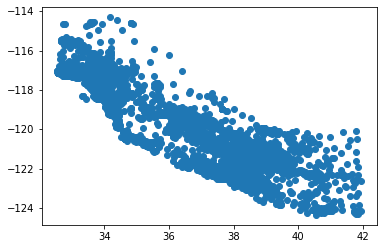

In [49]:
plt.scatter(lat,long)

In [6]:

data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

<AxesSubplot:xlabel='total_bedrooms', ylabel='Density'>

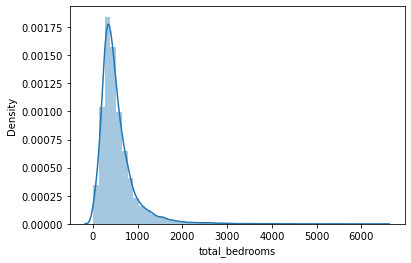

In [50]:
sns.distplot(data['total_bedrooms'])

In [52]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [53]:
def remove_outliers(data):
    for i in data.columns:
        data_frame = data[i]
        q1 = data_frame.quantile(0.25)
        q3 =data_frame.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3+ 1.5*iqr
        outliers = data[(data[i]<lower_bound)| (data[i]>upper_bound)]
        data.drop(outliers.index,axis = 0)
    return data

    

In [54]:
dat = data.drop("ocean_proximity",axis = 1)

KeyError: "['ocean_proximity'] not found in axis"

In [55]:
data = remove_outliers(dat)

NameError: name 'dat' is not defined

In [56]:
data.shape

(17000, 9)

In [57]:
data["total_bedrooms"] = data["total_bedrooms"].fillna(data["total_bedrooms"].mean())

In [58]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [59]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571,111400
16996,-124.27,40.69,36,2349,528,1194,465,2.5179,79000
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600
16998,-124.30,41.80,19,2672,552,1298,478,1.9797,85800


In [60]:
lat_long = data[['longitude','latitude']]

In [61]:
X = lat_long.to_numpy()

In [62]:
from sklearn.cluster import DBSCAN


In [63]:
DB = DBSCAN(eps = 0.2,min_samples = 15).fit(X)

In [64]:
data["clusters"]=DB.labels_


In [65]:
data["clusters"].value_counts()

 2    9065
 4    6999
-1     401
 7     219
 9      95
 0      84
 6      77
 3      21
 5      18
 1      15
 8       6
Name: clusters, dtype: int64

In [66]:
import plotly.express as px
labels = DB.labels_

In [83]:
px.scatter(x = lat,y = long,color = data['clusters'])

In [68]:
from sklearn.metrics import silhouette_score

In [69]:
silhouette_score(X,labels)

0.25721908995514264

In [70]:
#we can play with min samples ie how many points are required to be a core point

In [71]:
epsilons = np.linspace(0.01,1,num=15)
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [72]:
min_samples = np.arange(2,20,step = 3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [73]:
import itertools

In [27]:
combinations = list(itertools.product(epsilons,min_samples))

In [87]:
combinations

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [89]:
N = len(combinations)
N

90

In [76]:
def get_score_and_labels(combinations,X):
    scores = []
    all_labels_list = []
    for i ,(eps,min_samples) in enumerate(combinations):
        dbscan_cluster_model = DBSCAN(eps = eps,min_samples = min_samples)
        labels = dbscan_cluster_model.fit_predict(X)
        labels_set = set(labels)
        num_cluster = len(labels_set)
        if -1 in labels_set:
            num_clusters = -1
        if(num_cluster<2) or (num_cluster>50):
            scores.append(-10)
            all_labels_list.append('bad')
            c = (eps,min_samples)
            print(f"Combination {c} on iteration {i+1} has {num_clusters} clusters.Moving on")
            continue
        scores.append(silhouette_score(X,labels))
        all_labels_list.append(labels)
    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels =  all_labels_list[best_index]
    best_score = scores[best_index]
    
    return {
        'best_epsilon':best_parameters[0],
        'best_min_samples':best_parameters[1],
        'best_labels':best_labels,
        'best_score':best_score
    }
best_dict = get_score_and_labels(combinations,X)

Combination (0.01, 2) on iteration 1 has -1 clusters.Moving on
Combination (0.01, 5) on iteration 2 has -1 clusters.Moving on
Combination (0.01, 8) on iteration 3 has -1 clusters.Moving on
Combination (0.01, 11) on iteration 4 has -1 clusters.Moving on
Combination (0.01, 14) on iteration 5 has -1 clusters.Moving on
Combination (0.08071428571428571, 2) on iteration 7 has -1 clusters.Moving on
Combination (0.08071428571428571, 5) on iteration 8 has -1 clusters.Moving on
Combination (0.08071428571428571, 8) on iteration 9 has -1 clusters.Moving on
Combination (0.08071428571428571, 11) on iteration 10 has -1 clusters.Moving on
Combination (0.15142857142857144, 2) on iteration 13 has -1 clusters.Moving on
Combination (0.7878571428571429, 2) on iteration 67 has -1 clusters.Moving on
Combination (0.7878571428571429, 5) on iteration 68 has -1 clusters.Moving on
Combination (0.7878571428571429, 8) on iteration 69 has -1 clusters.Moving on
Combination (0.8585714285714285, 2) on iteration 73 has 

In [78]:
best_dict

{'best_epsilon': 0.7878571428571429,
 'best_min_samples': 11,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'best_score': 0.40974933857221485}

In [51]:
X 

array([[-114.31,   34.19],
       [-114.47,   34.4 ],
       [-114.56,   33.69],
       ...,
       [-124.3 ,   41.84],
       [-124.3 ,   41.8 ],
       [-124.35,   40.54]])

In [81]:
data['cluster'] = best_dict['best_labels']


In [82]:
data['cluster'].value_counts()

 0    16999
-1        1
Name: cluster, dtype: int64

In [84]:
import plotly.express as px

In [85]:
px.scatter(x = long,y = lat,color = data["cluster"])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [86]:
X2 = data[['total_rooms', 'housing_median_age']].to_numpy()


In [ ]:
X2_scaled = StandardScaler().fit_transform(X2)


In [ ]:
best_dict_3 = get_scores_and_labels(combinations, X2_scaled)